# Building Micrograd

source: https://github.com/karpathy/micrograd/

In [1]:
# micrograd Value class

class Value:
    """ stores a single scalar value and its gradient """

    def __init__(self, data, _children=(), _op='', label=''):
        self.data = data
        self.label = label  # optional, Value variable/node name

        # internal variables used for autograd graph construction
        self._prev = set(_children) # previous node
        self._op = _op              # the operation that produced this node

    def __repr__(self):
        return f"Value(data={self.data})"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')
        return out
    
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
        return out


In [2]:
# create functions for visualization, graphing and debugging using graphviz

from graphviz import Digraph

def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{ %s | data: %.4f }" % (n.label, n.data), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

# Building an Expression and Forward Pass

In [3]:
# let's build an expression
a = Value(2.0, label='a')
b = Value(-3.0, label='b')
c = a * b;  c.label='c'
d = Value(10.0, label='d')
e = c + d;  e.label='e'
f = Value(-2.0, label='f')
L = e * f;  L.label='L'
print(L) # L is loss function which we will try to minimize in backpropagation

Value(data=-8.0)


In [4]:
# and take a look at the Value objects
print(f'{a.label}: prev:{a._prev}, op: {a._op}')
print(f'{b.label}: prev:{b._prev}, op: {b._op}')
print(f'{c.label}: prev:{c._prev}, op: {c._op}')
print(f'{d.label}: prev:{d._prev}, op: {d._op}')
print(f'{e.label}: prev:{e._prev}, op: {e._op}')
print(f'{f.label}: prev:{f._prev}, op: {f._op}')
print(f'{L.label}: prev:{L._prev}, op: {L._op}')

a: prev:set(), op: 
b: prev:set(), op: 
c: prev:{Value(data=2.0), Value(data=-3.0)}, op: *
d: prev:set(), op: 
e: prev:{Value(data=10.0), Value(data=-6.0)}, op: +
f: prev:set(), op: 
L: prev:{Value(data=-2.0), Value(data=4.0)}, op: *


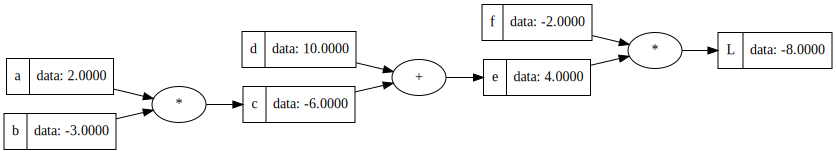

In [5]:
# let's take a look at the expression graph
draw_dot(L)

In [6]:
# conclusion so far:
# so far, we built out a mathematical expression using only (+) and (*) operators
# all the nodes are scaler valued along the way
# and we can do a forward pass to build out a mathematical expression from inputs (a, b) to a single output L
# we can also lay out a graph to visualise the forward pass
# and here the output of one forward pass is: L = -8.0

# Backpropagation

In [7]:
# and now:
# we would like to run backpropagation . . .
# we start at the end, L
# and we are going to do a reverse pass, and calculate the gradient along all the intermediate values
# and for every single intermediate values, we are going to calculate the derivative of each node w.r.t L

In [8]:
# i.e, we find out dL/dL, dL/df, dL/de, ..., dL/db, dL/da

In [9]:
# now, dL/dL = 1
# we need to figure out the other derivatives
#
# in the context of neural networks, we will be interested in
# the derivatives of the Loss function (L) w.r.t the nodes that consists of the weights (w) and biases (b)
#
# (the input leaf nodes and the intermediate Xs would be fixed values, and we are not interested in them)
# (we can only control/tune the w and b during training and those are the ones we are interested in for grads)

In [10]:
# let's figure out the intermediate grads with our dummy expression (dL/df, dL/de, ..., dL/da) in the next notebook